In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read in data from preprocessing
df = pd.read_csv('mental_health_tech.csv', index_col=0)
df.head(5)

,Self Employed,Total Employees,Tech/No Tech,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,...,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Sought Treatment,Age,Gender,Country,State,Remote
0,0,3,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Somewhat open,No,NaN,No,0,4,1.0,2,0,Sometimes
1,0,2,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Somewhat open,No,NaN,Yes,1,3,1.0,1,2,Never
2,0,2,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Somewhat open,Maybe/Not sure,Yes,No,1,4,1.0,2,0,Always
4,0,2,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Somewhat open,"Yes, I experienced",Yes,Yes,1,4,2.0,1,2,Sometimes
5,0,6,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Somewhat open,"Yes, I experienced",No,No,1,4,1.0,2,0,Sometimes


In [ ]:
df = df[['Age', 'Gender', 'MH Family History', 'Sought Treatment', 'Prev Awareness of Company MH Care', "Remote", "Country", "State", "Tech/No Tech", "Total Employees", "MH Benefits", "MH Resources", "Medical Leave"]]
df.head(5)

,Age,Gender,MH Family History,Sought Treatment,Prev Awareness of Company MH Care,Remote,Country,State,Tech/No Tech,Total Employees,MH Benefits,MH Resources,Medical Leave
0,4,1.0,No,0,N/A (not currently aware),Sometimes,2,0,1.0,3,Not eligible for coverage / N/A,No,Very easy
1,3,1.0,Yes,1,I was aware of some,Never,1,2,1.0,2,No,Yes,Somewhat easy
2,4,1.0,No,1,N/A (not currently aware),Always,2,0,1.0,2,No,No,Neither easy nor difficult
4,4,2.0,Yes,1,N/A (not currently aware),Sometimes,1,2,0.0,2,Yes,No,Neither easy nor difficult
5,4,1.0,No,1,"Yes, I was aware of all of them",Sometimes,2,0,1.0,6,Yes,Yes,Somewhat easy


In [ ]:
# Construct data frame that shows number of unique values for each column
d = {'Column Name': df.columns, 'Unique Values': df.nunique()}
unique_vals = pd.DataFrame(data=d).reset_index()[['Column Name', 'Unique Values']].sort_values(by='Unique Values', ascending=False)

# Selecting only column names that have a valid number of unique values for dummy variable transformation (filter out binary and large numbers of unique values)
valid_dummy = unique_vals[(unique_vals['Unique Values']!=2) & (unique_vals['Unique Values']!=53) & (unique_vals['Unique Values']!=48)]
dummy_list = valid_dummy['Column Name'].values
dummy_list

array(['Country', 'Total Employees', 'Medical Leave', 'Age', 'State',
       'Prev Awareness of Company MH Care', 'MH Benefits', 'Gender',
       'MH Family History', 'Remote', 'MH Resources'], dtype=object)

In [ ]:
# Make dummy variable columns for the valid column names we found above
df = pd.get_dummies(df, columns=dummy_list)
df.head()

,Sought Treatment,Tech/No Tech,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Total Employees_1,...,Gender_3.0,MH Family History_I don't know,MH Family History_No,MH Family History_Yes,Remote_Always,Remote_Never,Remote_Sometimes,MH Resources_I don't know,MH Resources_No,MH Resources_Yes
0,0,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,1.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,1,0.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# Column we are predicting
y_train = df['Sought Treatment']

In [ ]:
x_train = df.drop(['Sought Treatment'], axis=1)

#use validation
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.30)

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
df_rf = pd.read_csv('mental_health_tech.csv', index_col=0)
df_rf.head()

,Self Employed,Total Employees,Tech/No Tech,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,...,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Sought Treatment,Age,Gender,Country,State,Remote
0,0,3,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Somewhat open,No,NaN,No,0,4,1.0,2,0,Sometimes
1,0,2,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Somewhat open,No,NaN,Yes,1,3,1.0,1,2,Never
2,0,2,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Somewhat open,Maybe/Not sure,Yes,No,1,4,1.0,2,0,Always
4,0,2,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Somewhat open,"Yes, I experienced",Yes,Yes,1,4,2.0,1,2,Sometimes
5,0,6,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Somewhat open,"Yes, I experienced",No,No,1,4,1.0,2,0,Sometimes


In [ ]:
df_rf = df_rf[["Age", "Gender", "MH Family History", "Sought Treatment", "Remote", "Country", "State", "Tech/No Tech", "Total Employees", "MH Benefits", "MH Resources", "Medical Leave"]]

In [ ]:
d_rf = {'Column Name': df_rf.columns, 'Unique Values': df_rf.nunique()}
unique_vals_rf = pd.DataFrame(data=d_rf).reset_index()[['Column Name', 'Unique Values']].sort_values(by='Unique Values', ascending=False)

# Selecting only column names that have a valid number of unique values for dummy variable transformation (filter out binary and large numbers of unique values)
valid_dummy_rf = unique_vals_rf[(unique_vals_rf['Unique Values']!=2) & (unique_vals_rf['Unique Values']!=53) & (unique_vals_rf['Unique Values']!=48)]
dummy_list_rf = valid_dummy_rf['Column Name'].values
dummy_list_rf

array(['Country', 'Total Employees', 'Medical Leave', 'Age', 'State',
       'MH Benefits', 'Gender', 'MH Family History', 'Remote',
       'MH Resources'], dtype=object)

In [ ]:
df_rf = pd.get_dummies(df_rf, columns=dummy_list_rf)
df_rf.head()

,Sought Treatment,Tech/No Tech,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Total Employees_1,...,Gender_3.0,MH Family History_I don't know,MH Family History_No,MH Family History_Yes,Remote_Always,Remote_Never,Remote_Sometimes,MH Resources_I don't know,MH Resources_No,MH Resources_Yes
0,0,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,1.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,1,0.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
df_rf.loc[df_rf['Tech/No Tech'] == 1.0, 'Tech/No Tech'] = 'Yes'
df_rf.loc[df_rf['Tech/No Tech'] == 0.0, 'Tech/No Tech'] = 'No'

df_rf.loc[df_rf['Tech/No Tech'] == 'Yes', 'Tech/No Tech'] = 1
df_rf.loc[df_rf['Tech/No Tech'] == 'No', 'Tech/No Tech'] = 0

In [ ]:
features = df_rf.drop(['Sought Treatment'], axis=1)
target = df_rf['Sought Treatment']

#cross validation
from sklearn.model_selection import train_test_split
X_train_rf, X_val_rf, Y_train_rf, Y_val_rf = train_test_split(features, target, test_size=0.30)

In [ ]:
#random forest modelling

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
forest.fit(X_train_rf, Y_train_rf)
print(accuracy_score(forest.predict(X_val_rf), Y_val_rf))

0.6967930029154519


In [ ]:
df_nn = pd.read_csv('mental_health_tech.csv', index_col=0)
df_nn.head(5)


,Self Employed,Total Employees,Tech/No Tech,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,...,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Sought Treatment,Age,Gender,Country,State,Remote
0,0,3,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Somewhat open,No,NaN,No,0,4,1.0,2,0,Sometimes
1,0,2,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Somewhat open,No,NaN,Yes,1,3,1.0,1,2,Never
2,0,2,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Somewhat open,Maybe/Not sure,Yes,No,1,4,1.0,2,0,Always
4,0,2,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Somewhat open,"Yes, I experienced",Yes,Yes,1,4,2.0,1,2,Sometimes
5,0,6,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Somewhat open,"Yes, I experienced",No,No,1,4,1.0,2,0,Sometimes


In [ ]:
def medical_leave_difficulty(row):
    if 'difficult' in row['Medical Leave']:
        return 1
    else:
        return 0

df_nn['Medical Leave'] = df_nn.apply(lambda row:medical_leave_difficulty(row), axis=1)

In [ ]:
df_nn = df_nn[['Age', 'Gender', 'MH Family History', 'Sought Treatment', 'Prev Awareness of Company MH Care', "Remote", "Country", "State", "Tech/No Tech", "Total Employees", "MH Benefits", "MH Resources", "Medical Leave"]]
df_nn

,Age,Gender,MH Family History,Sought Treatment,Prev Awareness of Company MH Care,Remote,Country,State,Tech/No Tech,Total Employees,MH Benefits,MH Resources,Medical Leave
0,4,1.0,No,0,N/A (not currently aware),Sometimes,2,0,1.0,3,Not eligible for coverage / N/A,No,0
1,3,1.0,Yes,1,I was aware of some,Never,1,2,1.0,2,No,Yes,0
2,4,1.0,No,1,N/A (not currently aware),Always,2,0,1.0,2,No,No,1
4,4,2.0,Yes,1,N/A (not currently aware),Sometimes,1,2,0.0,2,Yes,No,1
5,4,1.0,No,1,"Yes, I was aware of all of them",Sometimes,2,0,1.0,6,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,3,2.0,I don't know,1,N/A (not currently aware),Sometimes,3,0,1.0,4,I don't know,I don't know,0
1427,4,2.0,Yes,1,I was aware of some,Always,1,2,1.0,5,Yes,No,0
1430,5,1.0,Yes,1,I was aware of some,Sometimes,1,3,1.0,4,Yes,Yes,1
1431,3,2.0,Yes,0,N/A (not currently aware),Sometimes,1,2,0.0,4,I don't know,Yes,1


In [ ]:
# Construct data frame that shows number of unique values for each column
d_nn = {'Column Name': df_nn.columns, 'Unique Values': df_nn.nunique()}
unique_vals_nn = pd.DataFrame(data=d_nn).reset_index()[['Column Name', 'Unique Values']].sort_values(by='Unique Values', ascending=False)

# Selecting only column names that have a valid number of unique values for dummy variable transformation (filter out binary and large numbers of unique values)
valid_dummy_nn = unique_vals_nn[(unique_vals_nn['Unique Values']!=2) & (unique_vals_nn['Unique Values']!=53) & (unique_vals_nn['Unique Values']!=48)]
dummy_list_nn = valid_dummy['Column Name'].values
dummy_list_nn

df_nn = pd.get_dummies(df_nn, columns=dummy_list_nn)
df_nn.head()

,Sought Treatment,Tech/No Tech,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Total Employees_1,...,Gender_3.0,MH Family History_I don't know,MH Family History_No,MH Family History_Yes,Remote_Always,Remote_Never,Remote_Sometimes,MH Resources_I don't know,MH Resources_No,MH Resources_Yes
0,0,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,1.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,1,0.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
y_train_nn = df_nn['Sought Treatment']
x_train_nn = df_nn.drop(['Sought Treatment'], axis=1)
df_nn.head(5)
X_train_nn, X_val_nn, Y_train_nn, Y_val_nn = train_test_split(x_train_nn, y_train_nn, test_size=0.30)
y_train_nn

0       0
1       1
2       1
4       1
5       1
       ..
1426    1
1427    1
1430    1
1431    0
1432    0
Name: Sought Treatment, Length: 1143, dtype: int64

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(hidden_layer_sizes=(15,20,15), activation = "relu", max_iter=1000,
                        solver='adam', verbose=1, random_state=42)

clf_NN.fit(X_train_nn, Y_train_nn)

print(accuracy_score(clf_NN.predict(X_val_nn), Y_val_nn))

Iteration 1, loss = 0.70947759
Iteration 2, loss = 0.69223756
Iteration 3, loss = 0.68066629
Iteration 4, loss = 0.67116279
Iteration 5, loss = 0.66403072
Iteration 6, loss = 0.65952346
Iteration 7, loss = 0.65371592
Iteration 8, loss = 0.64897401
Iteration 9, loss = 0.64361561
Iteration 10, loss = 0.63776239
Iteration 11, loss = 0.63178778
Iteration 12, loss = 0.62576571
Iteration 13, loss = 0.61974436
Iteration 14, loss = 0.61342656
Iteration 15, loss = 0.60701187
Iteration 16, loss = 0.60023374
Iteration 17, loss = 0.59337755
Iteration 18, loss = 0.58701550
Iteration 19, loss = 0.58027517
Iteration 20, loss = 0.57422793
Iteration 21, loss = 0.56943692
Iteration 22, loss = 0.56371512
Iteration 23, loss = 0.55941492
Iteration 24, loss = 0.55511779
Iteration 25, loss = 0.55140292
Iteration 26, loss = 0.54777958
Iteration 27, loss = 0.54440435
Iteration 28, loss = 0.54114908
Iteration 29, loss = 0.53822337
Iteration 30, loss = 0.53575352
Iteration 31, loss = 0.53307667
Iteration 32, los

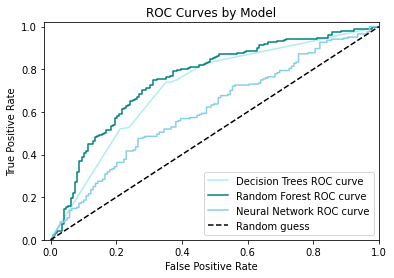

In [ ]:
y_pred_prob = clf.predict_proba(X_val)[:,1]
y_pred_prob_rf = forest.predict_proba(X_val_rf)[::,1]
y_pred_prob_nn = clf_NN.predict_proba(X_val_nn)[:,1]
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(Y_val, y_pred_prob)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_val_rf, y_pred_prob_rf)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(Y_val_nn, y_pred_prob_nn)
# create plot
plt.plot(fpr, tpr, label='Decision Trees ROC curve', color='paleturquoise')
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC curve', color='teal')
plt.plot(fpr_nn, tpr_nn, label='Neural Network ROC curve', color='skyblue')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curves by Model')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=387b3f34-ad6b-4fed-8016-3e4e46161261' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>